In [56]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = '/Users/colleenjung/Desktop/UChicago/Notion_EDA/DataScientist.csv'  # Replace with your file path
df = pd.read_csv(file_path)
df.describe()

,Unnamed: 0,index,Rating,Founded
count,3909.000000,3909.000000,3909.000000,3909.000000
mean,1954.000000,2167.446662,3.283576,1479.154771
std,1128.575429,1247.657849,1.575749,855.750138
min,0.000000,0.000000,-1.000000,-1.000000
25%,977.000000,1121.000000,3.200000,1625.000000
50%,1954.000000,2161.000000,3.700000,1976.000000
75%,2931.000000,3249.000000,4.100000,2002.000000
max,3908.000000,4379.000000,5.000000,2020.000000


In [57]:
df.head(10)
columns(df)

NameError: name 'columns' is not defined

In [5]:
# outliers in rating & founded
# we can further investigate the scatterplot of founded vs rating

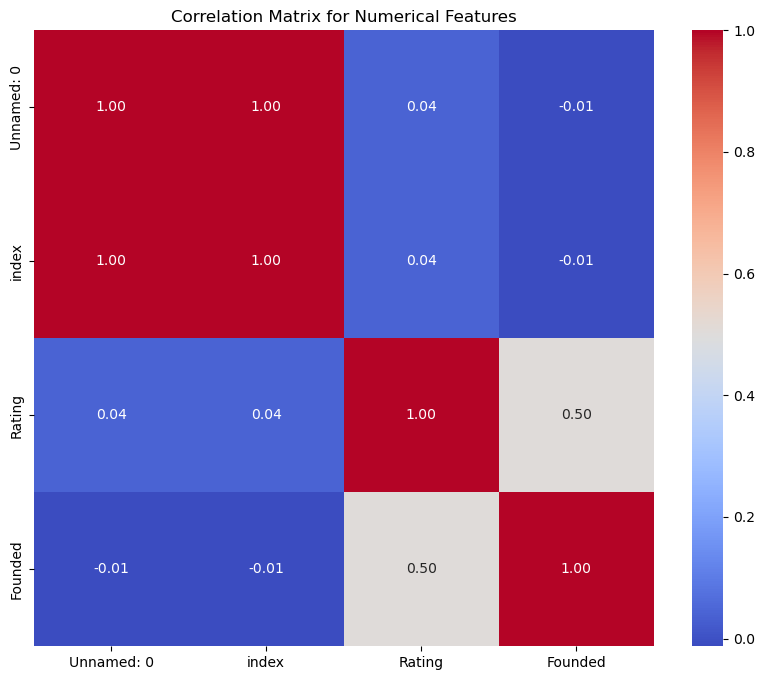

In [6]:
# For the correlation matrix, we only consider numerical columns
numerical_data = df.select_dtypes(include=['float64', 'int64'])

# Compute the correlation matrix
correlation_matrix = numerical_data.corr()

# Plotting the correlation matrix
plt.figure(figsize=(10, 8))
heatmap = sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix for Numerical Features')
plt.show()


In [7]:
#Clean1-Easy Apply column has -1 values, replacing them with boolean value False
df['Easy Apply'] = df['Easy Apply'].fillna(False).astype(bool) 
df['Easy Apply'].value_counts()

#df.replace(['-1'], [np.nan], inplace=True)
df.replace(['-1.0'], [np.nan], inplace=True)
df.replace([-1], [np.nan], inplace=True)

NameError: name 'np' is not defined

In [8]:
df.isnull().sum()

Unnamed: 0           0
index                0
Job Title            0
Salary Estimate      0
Job Description      0
Rating               0
Company Name         0
Location             0
Headquarters         0
Size                 0
Founded              0
Type of ownership    0
Industry             0
Sector               0
Revenue              0
Competitors          0
Easy Apply           0
dtype: int64

In [ ]:
#Creating separate columns of Salary Estimate as minimum and maximum salary

In [9]:
df_salary = df['Salary Estimate'].str.split("-",expand=True,)

minimum_salary = df_salary[0]
minimum_salary = minimum_salary.str.replace('K',' ')


maximum_salary = df_salary[1].str.replace('(Glassdoor est.)', ' ')
maximum_salary = maximum_salary.str.replace('(', ' ')
maximum_salary = maximum_salary.str.replace(')', ' ')
maximum_salary = maximum_salary.str.replace('K', ' ')
maximum_salary = maximum_salary.str.replace('Employer est.', ' ')
maximum_salary = maximum_salary.str.replace('Per Hour', ' ')

maximum_salary = maximum_salary.str.replace('$', ' ').fillna(0).astype(int)
minimum_salary = minimum_salary.str.replace('$', ' ').fillna(0).astype(int)

In [10]:
df['Minimum Salary'] = minimum_salary
df['Maximum Salary'] = maximum_salary

df.drop('Salary Estimate',axis = 1,inplace = True)
df['Company Name'] = df['Company Name'].str.replace('\n.*', ' ')
df['Est_Salary']= (df['Minimum Salary']+df['Maximum Salary'])/2
df['Est_Salary']

0       146.0
1       146.0
2       146.0
3       146.0
4       146.0
        ...  
3904     83.5
3905     83.5
3906     83.5
3907     83.5
3908     83.5
Name: Est_Salary, Length: 3909, dtype: float64

In [11]:
#Making city and state columns for both Location and Headquaters
Location = df['Location'].str.split(",",expand=True,)
Location_City = Location[0]
Location_State = Location[1]
df['Location City'] = Location_City
df['Location State'] = Location_State
df.drop('Location',axis = 1, inplace = True)


HQ = df['Headquarters'].str.split(",",expand=True)
Headquarters_City = HQ[0]
Headquarters_State = HQ[1]
df['Headquarters City'] = Headquarters_City
df['Headquarters State'] = Headquarters_State
df.drop('Headquarters',axis = 1, inplace = True)

In [12]:
#Separating department and from job title column --and drop dep.
department = df['Job Title'].str.split(',', expand = True)
df['Job Title'] = department[0]


In [13]:
df['Job Title'].value_counts()

Job Title
Data Scientist                                       335
Data Engineer                                        268
Data Analyst                                         264
Senior Data Scientist                                104
Senior Data Analyst                                   52
                                                    ... 
Principal Device Modeling Engineer                     1
SQL/SAS Data Analyst                                   1
Marketing Data Analyst Coordinator                     1
Greenplum /Big Data Engineer/Architect                 1
Patient Safety Physician or Safety Scientist - UK      1
Name: count, Length: 1797, dtype: int64

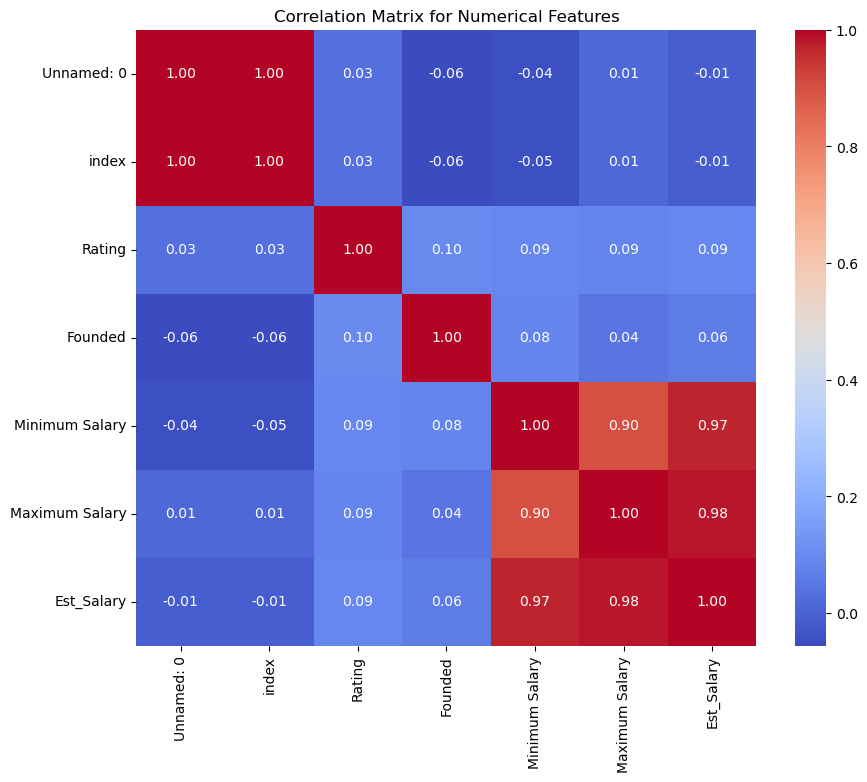

In [14]:
#clean2
clean_df = df[(df['Rating'] >= 0) & (df['Founded'] > 0)]

# For the correlation matrix, we only consider numerical columns
numerical_data = clean_df.select_dtypes(include=['float64', 'int64'])

# Compute the correlation matrix
correlation_matrix = numerical_data.corr()

# Plotting the correlation matrix
plt.figure(figsize=(10, 8))
heatmap = sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix for Numerical Features')
plt.show()
# we can further investigate the scatterplot of founded vs rating

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
import numpy as np

## Preparing data for modeling for clean_df

# We will use 'Rating' as the target variable and 'Founded' as the feature.
X =clean_df[['Founded']]
y = clean_df['Rating']

# Normalizing data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Splitting the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Adding a constant to the model (intercept)
X_train_sm = sm.add_constant(X_train)

# Fitting the model using statsmodels
model = sm.OLS(y_train, X_train_sm)
results = model.fit()

# Getting the summary of the regression
summary = results.summary()
summary_pvalues = results.pvalues



In [16]:
# Extracting the p-value for the 'Founded' coefficient
p_value = summary_pvalues[1]  # Index 1 is 'Founded' after the constant

summary, p_value

#Ho : NO relationship
#Ha: There is realtionhip btw 'rating' and 'founded'

# reject the null and conlude the that there is a relationshion
# given that R-squared: 0.008 goodness of fit questionable.

(<class 'statsmodels.iolib.summary.Summary'>
 """
                             OLS Regression Results                            
 Dep. Variable:                 Rating   R-squared:                       0.008
 Model:                            OLS   Adj. R-squared:                  0.007
 Method:                 Least Squares   F-statistic:                     18.32
 Date:                Thu, 30 Nov 2023   Prob (F-statistic):           1.94e-05
 Time:                        18:00:08   Log-Likelihood:                -1900.6
 No. Observations:                2319   AIC:                             3805.
 Df Residuals:                    2317   BIC:                             3817.
 Df Model:                           1                                         
 Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
 ---------------------------------------------------------------------

In [17]:
##modeling for df


# We will use 'Rating' as the target variable and 'Founded' as the feature.
X =df[['Founded']]
y =df['Rating']

# Normalizing data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Splitting the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Adding a constant to the model (intercept)
X_train_sm = sm.add_constant(X_train)

# Fitting the model using statsmodels
model = sm.OLS(y_train, X_train_sm)
results = model.fit()

# Getting the summary of the regression
summary = results.summary()
summary_pvalues = results.pvalues



In [18]:
# Extracting the p-value for the 'Founded' coefficient
p_value = summary_pvalues[1]  # Index 1 is 'Founded' after the constant

summary, p_value

#Ho : NO relationship
#Ha: There is realtionhip btw 'rating' and 'founded'
# rejct the null and conlude the that there is a relationshion
# given that R-squared: 0.260 goodness of fit slightly better.

(<class 'statsmodels.iolib.summary.Summary'>
 """
                             OLS Regression Results                            
 Dep. Variable:                 Rating   R-squared:                       0.260
 Model:                            OLS   Adj. R-squared:                  0.260
 Method:                 Least Squares   F-statistic:                     1098.
 Date:                Thu, 30 Nov 2023   Prob (F-statistic):          1.38e-206
 Time:                        18:00:11   Log-Likelihood:                -5408.0
 No. Observations:                3127   AIC:                         1.082e+04
 Df Residuals:                    3125   BIC:                         1.083e+04
 Df Model:                           1                                         
 Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
 ---------------------------------------------------------------------

In [19]:
# The provided code snippet seems to refer to 'df', which is not defined in the current context.
# Assuming 'df' refers to 'data_scientist_df', the original DataFrame loaded previously.
# Let's createdd a clean DataFrame without outliers and then perform ANOVA.

# Creating a clean DataFrame without outliers for 'Rating' and 'Founded'
clean_df = df[(df['Rating'] >= 0) & (df['Founded'] > 0)]

# Now, we fit two different OLS models: one with the original dataset and one with the cleaned dataset.

# Original DataFrame with outliers
X_orig = df[['Founded']]
y_orig = df['Rating']
X_orig_scaled = scaler.fit_transform(X_orig[X_orig['Founded'] > 0])  # Scaling only valid 'Founded' values
X_orig_scaled_with_const = sm.add_constant(X_orig_scaled)  # Adding a constant
model_orig = sm.OLS(y_orig[(X_orig['Founded'] > 0)], X_orig_scaled_with_const)  # Fitting the model
results_orig = model_orig.fit()

# Cleaned DataFrame without outliers
X_clean = clean_df[['Founded']]
y_clean = clean_df['Rating']
X_clean_scaled = scaler.fit_transform(X_clean)  # Scaling
X_clean_scaled_with_const = sm.add_constant(X_clean_scaled)  # Adding a constant
model_clean = sm.OLS(y_clean, X_clean_scaled_with_const)  # Fitting the model
results_clean = model_clean.fit()

# Perform ANOVA (Analysis of Variance) to compare the two models
anova_results = sm.stats.anova_lm(results_orig, results_clean)
anova_results


,df_resid,ssr,df_diff,ss_diff,F,Pr(>F)
0,2930.0,1624.487326,0.0,NaN,NaN,NaN
1,2897.0,866.292937,33.0,758.194388,76.833452,0.0


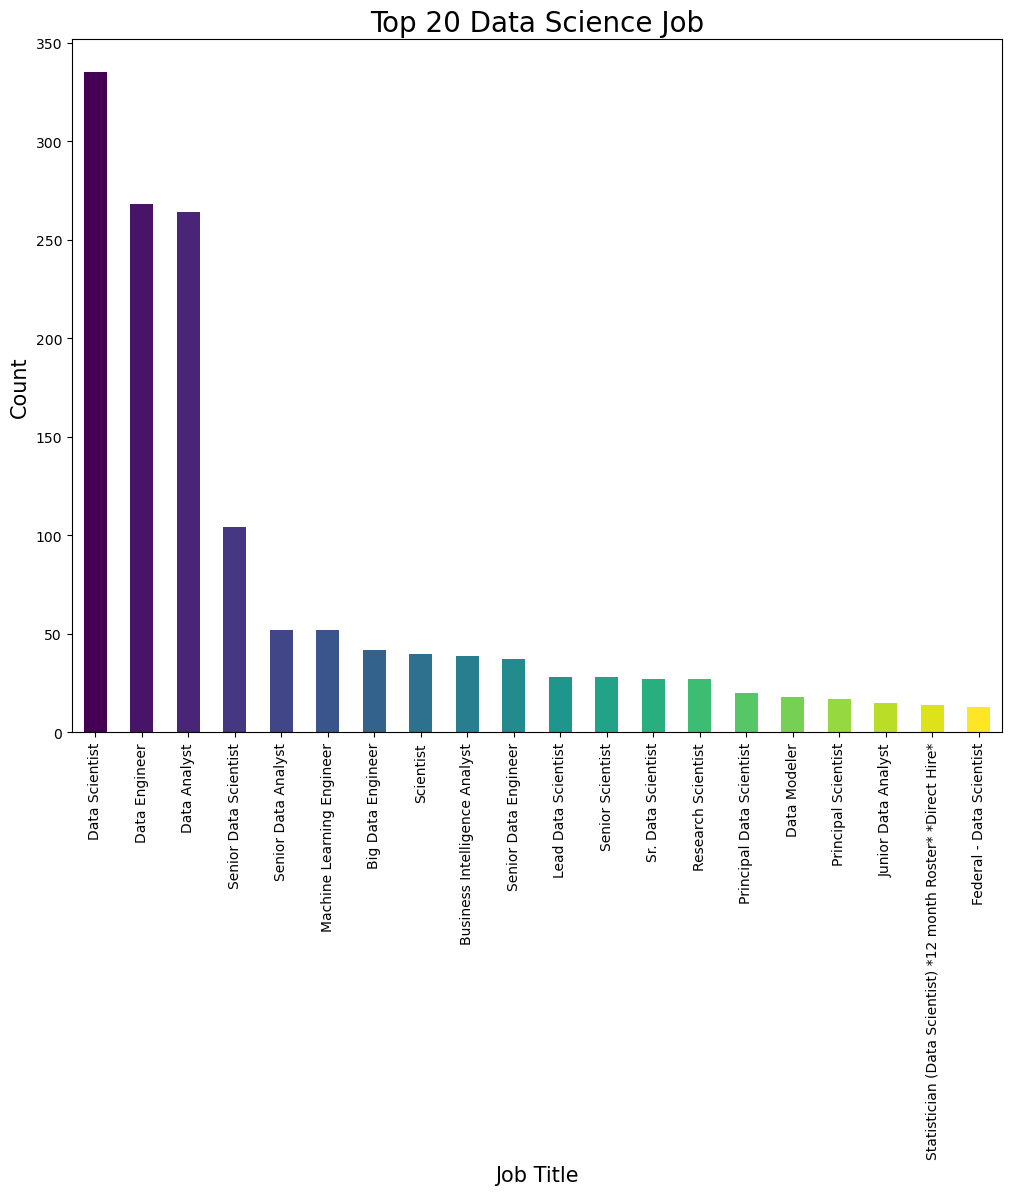

In [20]:
plt.rcParams['figure.figsize'] = (12,9)
color = plt.cm.viridis(np.linspace(0,1,20))
df["Job Title"].value_counts().sort_values(ascending=False).head(20).plot.bar(color=color)
plt.title("Top 20 Data Science Job",fontsize=20)
plt.xlabel("Job Title",fontsize=15)
plt.ylabel("Count",fontsize=15)
plt.show()

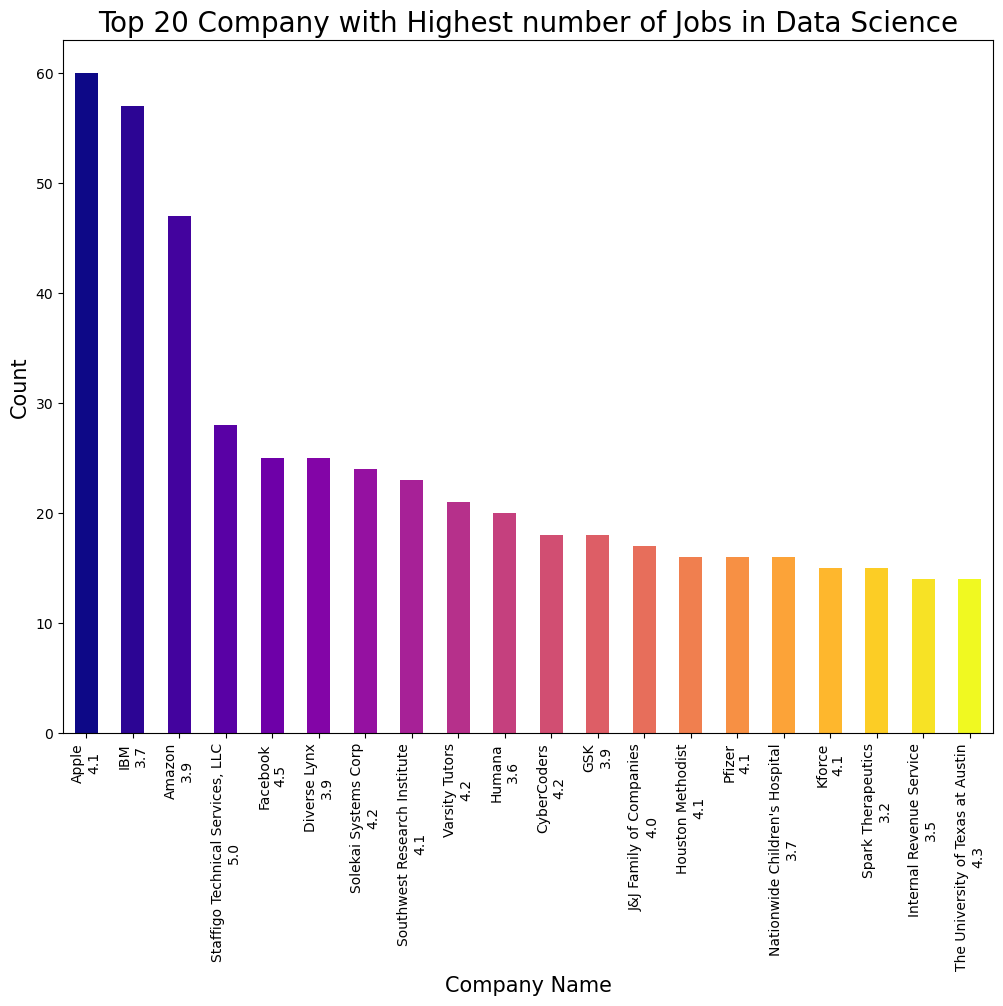

In [21]:
plt.rcParams["figure.figsize"] = (12,9)
color = plt.cm.plasma(np.linspace(0,1,20))
df["Company Name"].value_counts().sort_values(ascending=False).head(20).plot.bar(color=color)
plt.title("Top 20 Company with Highest number of Jobs in Data Science",fontsize=20)
plt.xlabel("Company Name",fontsize=15)
plt.ylabel("Count",fontsize=15)
plt.show()

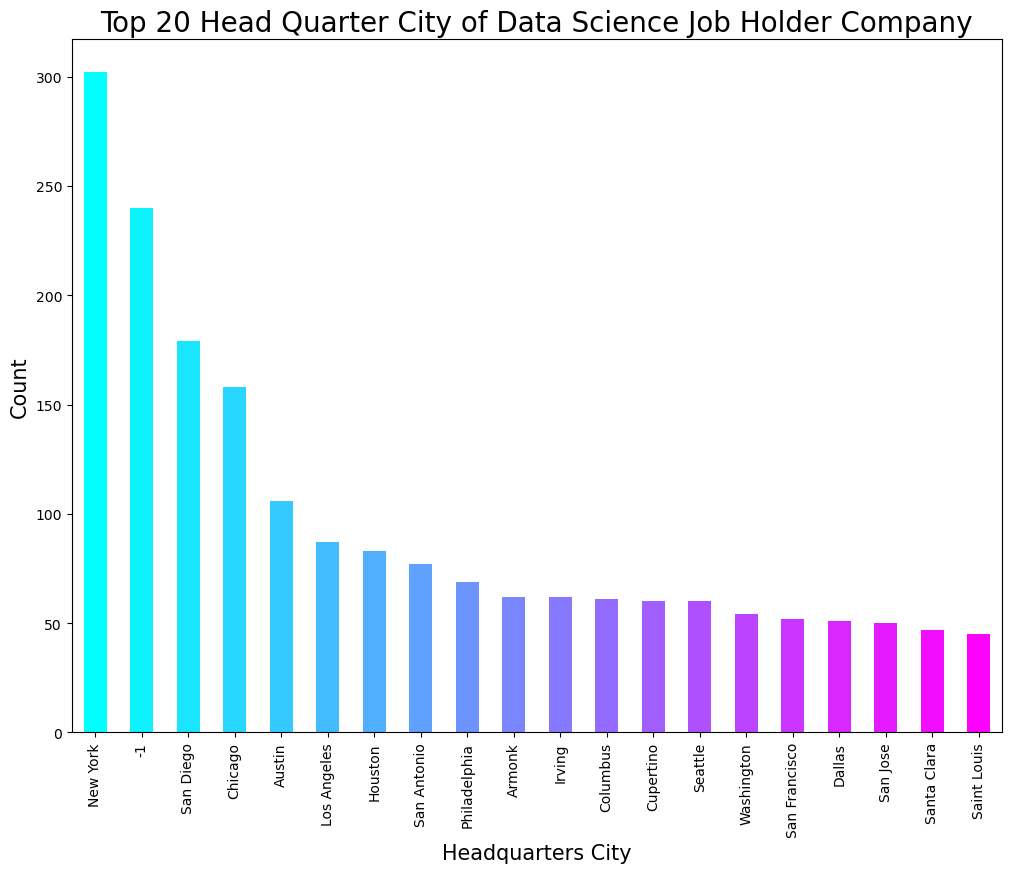

In [22]:
plt.rcParams['figure.figsize'] = (12,9)
color = plt.cm.cool(np.linspace(0,1,20))
df["Headquarters City"].value_counts().sort_values(ascending=False).head(20).plot.bar(color=color)
plt.title("Top 20 Head Quarter City of Data Science Job Holder Company",fontsize=20)
plt.xlabel("Headquarters City",fontsize=15)
plt.ylabel("Count",fontsize=15)
plt.show()

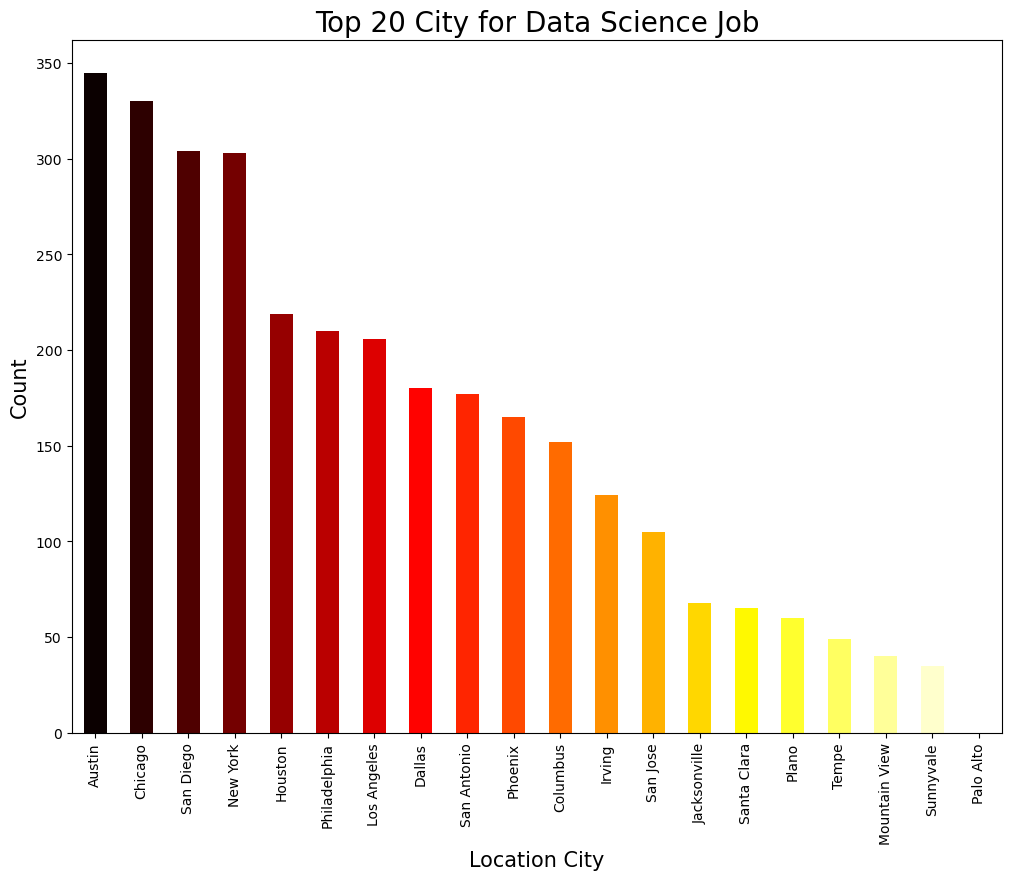

In [23]:
plt.rcParams['figure.figsize'] = (12,9)
color = plt.cm.hot(np.linspace(0,1,20))
df["Location City"].value_counts().sort_values(ascending=False).head(20).plot.bar(color=color)
plt.title("Top 20 City for Data Science Job",fontsize=20)
plt.xlabel("Location City",fontsize=15)
plt.ylabel("Count",fontsize=15)
plt.show()

In [24]:
data4 = pd.DataFrame(df['Sector'].value_counts())
data4.head()

,count
Sector,
Information Technology,1124
Business Services,679
-1,546
Biotech & Pharmaceuticals,293
Finance,270


# Problem: "Does a Company's Glassdoor Rating and Founded year Guarantee Higher Salaries?"

# How: 'rating' & 'founded year'-> salary 예측 

# Prediction Method: 

**1. linear Regression**

**2. XG Boost**

In [25]:
data1 = df.groupby('Job Title')[['Minimum Salary', 'Maximum Salary', 'Est_Salary']].mean().sort_values(['Maximum Salary','Minimum Salary'],ascending=False).head(25)
data1.head(15)

,Minimum Salary,Maximum Salary,Est_Salary
Job Title,,,
Data Science Analyst/Engineer,156.000000,254.000000,205.0
Deployed Data Scientist,156.000000,254.000000,205.0
NLP Machine Learning Engineer,156.000000,254.000000,205.0
Community Data Manager,200.000000,250.000000,225.0
Data Scientist Machine Learning at Google,200.000000,250.000000,225.0
Data science researcher,200.000000,250.000000,225.0
NLP Data Scientist,200.000000,250.000000,225.0
Principal Data Scientist-Recommendation Systems,200.000000,250.000000,225.0
Senior HR Data Analyst,200.000000,250.000000,225.0


In [ ]:
data1.tail()

**linear Regression**

In [26]:
#Split the dataset into training and validation data:
#1. linear Regression
import pandas as pd
from sklearn.model_selection import train_test_split

# Replace -1 with NaN in the specific columns
df = df.replace({'Rating': {-1: pd.NA}, 'Founded': {-1: pd.NA}, 'Est_Salary': {-1: pd.NA}})

# Drop rows with NaN values in any of the specified columns
df = df.dropna(subset=['Rating', 'Founded', 'Est_Salary'])

#1. linearRegression
# Assuming df_clean is your cleaned dataframe already loaded in Python
X = df[['Rating', 'Founded']]  # Features
y = df['Est_Salary']  # Target variable

# Split the dataset into training and validation sets (80% train, 20% validation)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=123)

#X.isna().sum()

In [27]:
#Standardize the feature values:
from sklearn.preprocessing import StandardScaler

# Initialize the scaler
scaler = StandardScaler()

# Fit the scaler on the training data and transform it
X_train_scaled = scaler.fit_transform(X_train)

# Only transform the validation data
X_val_scaled = scaler.transform(X_val)


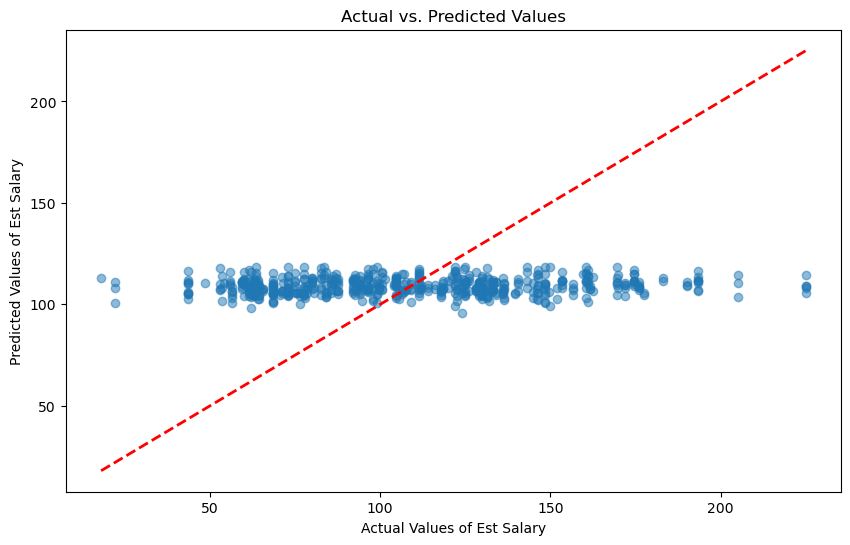

In [28]:
from sklearn.linear_model import LinearRegression

# Initialize the model
model = LinearRegression()

# Fit the model on the training data
model.fit(X_train_scaled, y_train)

model.predict(X_val_scaled)

import matplotlib.pyplot as plt

# After fitting the model and making predictions
predictions = model.predict(X_val_scaled)

# Scatter plot of actual vs. predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_val, predictions, alpha=0.5)
plt.title('Actual vs. Predicted Values')
plt.xlabel('Actual Values of Est Salary')
plt.ylabel('Predicted Values of Est Salary')

# Plot a line for perfect predictions
min_val = min(min(y_val), min(predictions))
max_val = max(max(y_val), max(predictions))
plt.plot([min_val, max_val], [min_val, max_val], color='red', linestyle='--', linewidth=2)

plt.show()


In [29]:
import pandas as pd

# Convert the scaled training features and the predictions to a DataFrame
df_preds = pd.DataFrame(X_val, columns=["Rating", "Founded"])
df_preds["EstSalary"] = predictions

# Display the first few rows of the DataFrame
df_preds.head(10)

df_preds.describe()


,EstSalary
count,580.000000
mean,109.090700
std,3.997367
min,95.883991
25%,106.304731
50%,108.893696
75%,111.525093
max,118.579217


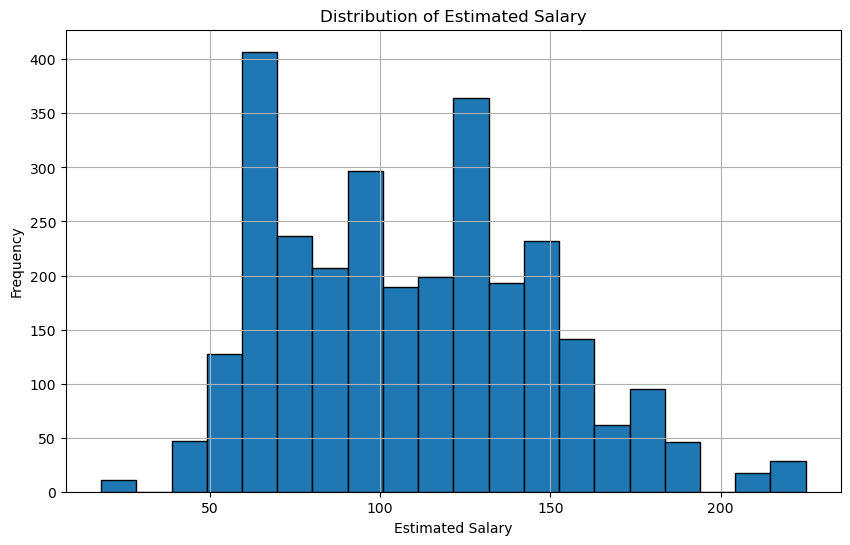

In [30]:
import matplotlib.pyplot as plt

# Assuming y contains the 'Est_Salary' column after cleaning
# Replace 'y' with your actual 'Est_Salary' data
y = df['Est_Salary']

# Plotting the distribution of 'Est_Salary'
plt.figure(figsize=(10, 6))
plt.hist(y, bins=20, edgecolor='black')
plt.title('Distribution of Estimated Salary')
plt.xlabel('Estimated Salary')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


In [31]:
mse = mean_squared_error(y_val, predictions)
print(f"Mean Squared Error: {mse}")

NameError: name 'mean_squared_error' is not defined

**xgboost**

In [32]:
!pip install xgboost

In [33]:
#2. XG Boost
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Assuming df_clean is your cleaned dataframe already loaded in Python
X = df[['Rating', 'Founded']]  # Features
y = df['Est_Salary']  # Target variable

# Split the dataset into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=123)

# Initialize XGBoost regressor object
xg_reg = xgb.XGBRegressor(objective ='reg:squarederror', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 5, alpha = 10, n_estimators = 10)

# Fit the regressor to the training set
xg_reg.fit(X_train, y_train)

# Predict the model on the validation set
preds = xg_reg.predict(X_val)

# Compute and print the mean squared error of the predictions
mse = mean_squared_error(y_val, preds)
print(f"Mean Squared Error: {mse}")


ValueError: DataFrame.dtypes for data must be int, float, bool or category. When categorical type is supplied, The experimental DMatrix parameter`enable_categorical` must be set to `True`.  Invalid columns:Rating: object, Founded: object

In [34]:
df_preds = pd.DataFrame(X_val, columns=["Rating", "Founded"])
df_preds["pred_EstSalary"] = preds
# Display the first few rows of the DataFrame
df_preds.head()

#df_preds.describe()

NameError: name 'preds' is not defined

In [ ]:
# Scatter plot of actual vs. predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_val, predictions, alpha=0.5)
plt.title('Actual vs. Predicted Values')
plt.xlabel('Actual Values of Est Salary')
plt.ylabel('Predicted Values of Est Salary')

# Plot a line for perfect predictions
min_val = min(min(y_val), min(preds))
max_val = max(max(y_val), max(preds))
plt.plot([min_val, max_val], [min_val, max_val], color='red', linestyle='--', linewidth=2)

plt.show()

In [ ]:
import pandas as pd

# Assuming df is your original DataFrame and it's in the same order as df_preds
# Merge df_preds with df on index
merged_df = df_preds.merge(df[['Company Name', 'Job Title']], left_index=True, right_index=True)

# Define a function to categorize ratings
def categorize_rating(rating):
    if 3.0 <= rating < 4.0:
        return '3.0-4.0'
    elif 4.0 <= rating <= 5.0:
        return '4.0-5.0'
    else:
        return 'Other'

# Apply the function to create a new 'Rating Category' column
merged_df['Rating Category'] = merged_df['Rating'].apply(categorize_rating)


print(grouped_data)
merged_df

Modeling: Kmeans

the methodological steps we will be taking to build our model:

Training & experimenting K-means with 6 clusters (testing version)
Run the K-means on a rang of 2 -10 clusters (to find optimal number of cluster)
Creat Scree plot to visualize the inertia using Elbow method (for visualization)
Re-running K-means with n cluster


In [35]:
from sklearn.cluster import KMeans , k_means
import warnings
warnings.filterwarnings('ignore')

# RUNNING K-MEANS
data=df[['Rating', 'Founded', 'Est_Salary']]
X_train = data.values

# WE WILL START WITH 6 CLUSTERS FOR EXPLORATION
kmeans = KMeans(n_clusters=6, random_state=540)
kmeans = kmeans.fit(X_train)

# PRINT THE CLUSTERS THAT IS ASSIGNED FOR EACH OBSERVATION
print("The cluster are  :", kmeans.labels_)

# PRINT INERTIA
print("The Inertia is :", kmeans.inertia_)

The cluster are  : [2 2 2 ... 4 4 4]
The Inertia is : 2066483.2413299792


In [36]:
# RUNNING K-MEANS ON A RANG OF CLUSTERS TO FIND OPTIMAL NUMBER
no_of_clusters = range(2,10)
inertia =[]

for f in no_of_clusters:
    kmeans = KMeans(n_clusters=f, random_state=540)
    kmeans = kmeans.fit(X_train)
    u = kmeans.inertia_
    inertia.append(u)
    print("The inertia for :", f , "Cluster is : " , u)

The inertia for : 2 Cluster is :  6477308.167382045
The inertia for : 3 Cluster is :  3939330.5453242194
The inertia for : 4 Cluster is :  3042139.266973107
The inertia for : 5 Cluster is :  2508887.5482884594
The inertia for : 6 Cluster is :  2066483.2413299792
The inertia for : 7 Cluster is :  1785565.0149814142
The inertia for : 8 Cluster is :  1558447.5669458597
The inertia for : 9 Cluster is :  1351538.3764270283


Text(0.5, 1.0, 'Inertia Plot per k')

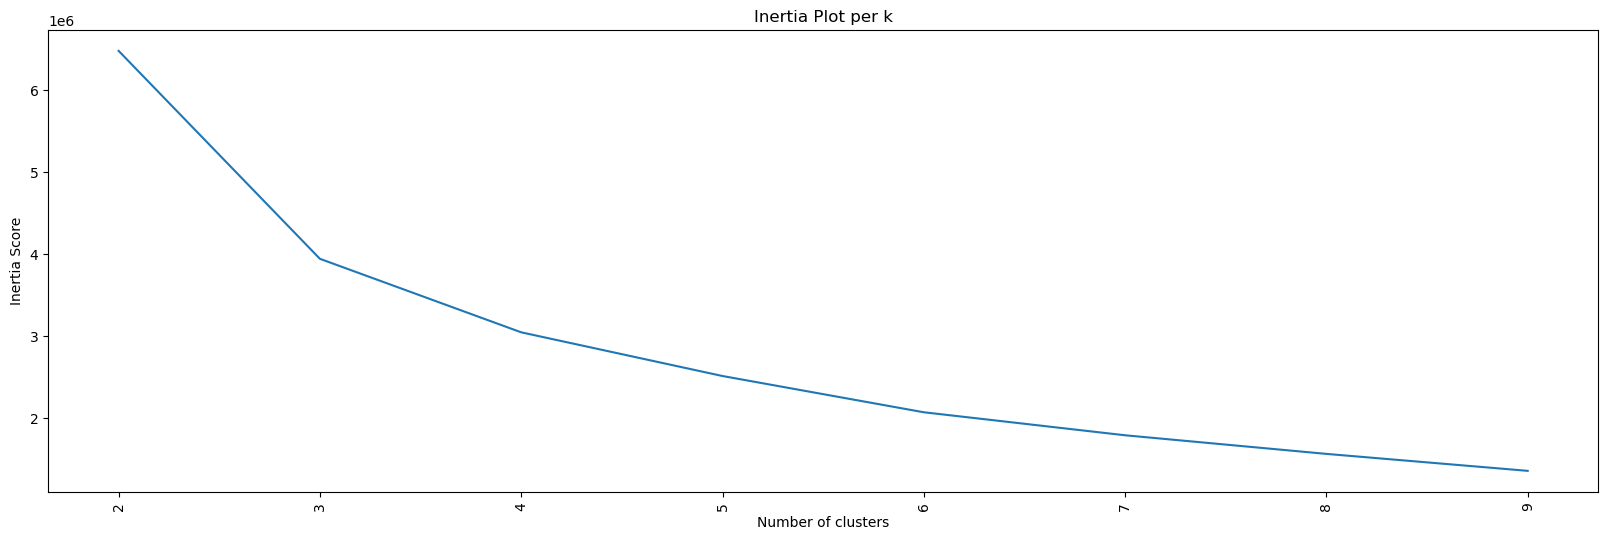

In [37]:
# CREATING SCREE PLOT TO VISUALIZE INERTIA - ELBOW METHOD
fig, (ax1) = plt.subplots(1, figsize =(20,6))
xx = np.arange(len(no_of_clusters))
ax1.plot(xx, inertia)
ax1.set_xticks(xx)
ax1.set_xticklabels(no_of_clusters, rotation ="vertical")
plt.xlabel("Number of clusters")
plt.ylabel("Inertia Score")
plt.title("Inertia Plot per k")

In [42]:
# RE-RUNNNG K-MEANS ON 4 CLUSTERS
kmeans = KMeans(n_clusters=4, random_state=2)
kmeans = kmeans.fit(X_train)

kmeans.labels_

# PREDICTIONS FOR NEW DATA
predictions = kmeans.predict(X_train)

# CALCULATING THE COUNTS FOR THE CLUSTER
unique , counts = np.unique(predictions, return_counts=True)
counts = counts.reshape(1,4)

# CREATING THE PLOT
countscldf = pd.DataFrame(counts, columns=[ "Cluster 1" , "Cluster 2", "Cluster 3", "Cluster 4"])

# DISPLAY THE PLOT
countscldf

,Cluster 1,Cluster 2,Cluster 3,Cluster 4
0,473,1209,1024,193


In [47]:
from sklearn.cluster import KMeans
import pandas as pd

# Assuming you have a DataFrame df with the relevant features
data = df[['Rating', 'Founded', 'Est_Salary']]
X_train = data.values

# Choose the number of clusters (k) based on your inertia plot interpretation
k = 4  # Replace with your chosen k
kmeans = KMeans(n_clusters=k, random_state=540)
kmeans.fit(X_train)

# Get centroids
centroids = kmeans.cluster_centers_

# Create a DataFrame for the centroids
centroids_df = pd.DataFrame(centroids, columns=['Rating', 'Founded', 'Est_Salary'])

# Print out the centroids
print(centroids_df)


     Rating      Founded  Est_Salary
0  3.874805  1997.473633  146.672363
1  3.770984  1826.683938  110.769430
2  3.778164  1995.765922   79.556245
3  3.670402  1914.959831  102.485201


In [50]:
# Assuming 'df' is your original DataFrame with all the necessary columns
data = df[['Rating', 'Founded', 'Est_Salary']]  # Use only the relevant columns for clustering
k = 4  # The number of clusters you've determined to be optimal
kmeans = KMeans(n_clusters=k, random_state=540)
kmeans.fit(data)

# Add the cluster labels to your original DataFrame
df['Cluster'] = kmeans.labels_

df.tail()

,Unnamed: 0,index,Job Title,Job Description,Rating,Company Name,Size,Founded,Type of ownership,Industry,...,Easy Apply,Minimum Salary,Maximum Salary,Est_Salary,Location City,Location State,Headquarters City,Headquarters State,Cluster_Label,Cluster
3902,3902,4373,Columbus Data Science Tutor Jobs,#Columbus Data Science Tutor Jobs\n\nVarsity T...,4.2,Varsity Tutors\n4.2,201 to 500 employees,2007,Company - Private,Internet,...,True,55,112,83.5,Columbus,OH,Saint Louis,MO,0,2
3903,3903,4374,Cyber Security Data Engineer,ApTask is a leading staffing and recruitment c...,3.9,ApTask\n3.9,201 to 500 employees,2010,Company - Private,IT Services,...,True,55,112,83.5,Dublin,OH,Iselin,NJ,0,2
3904,3904,4375,AWS Data Engineer,About Us\n\nTachyon Technologies is a Digital ...,4.4,Tachyon Technologies\n4.4,201 to 500 employees,2011,Company - Private,IT Services,...,True,55,112,83.5,Dublin,OH,Irving,TX,0,2
3905,3905,4376,Data Analyst â Junior,"Job description\nInterpret data, analyze resul...",5.0,"Staffigo Technical Services, LLC\n5.0",51 to 200 employees,2008,Company - Private,IT Services,...,True,55,112,83.5,Columbus,OH,Woodridge,IL,0,2
3906,3906,4377,Security Analytics Data Engineer,Job DescriptionThe Security Analytics Data Eng...,3.8,"PDS Tech, Inc.\n3.8",5001 to 10000 employees,1977,Company - Private,Staffing & Outsourcing,...,True,55,112,83.5,Dublin,OH,Irving,TX,0,2


In [51]:
# Group by the 'Cluster' label and find the top 5 for 'Job Title', 'Company Name', and 'Industry'
top_attributes_by_cluster = {}

# Define a function to return the top n most common elements in a Series
def top_n(series, n=5):
    return series.value_counts().head(n).index.tolist()

for cluster in range(kmeans.n_clusters):
    cluster_data = df[df['Cluster'] == cluster]
    top_attributes_by_cluster[cluster] = {
        'Top Job Titles': top_n(cluster_data['Job Title']),
        'Top Companies': top_n(cluster_data['Company Name']),
        'Top Industries': top_n(cluster_data['Industry'])
    }

# Creating a DataFrame from the top attributes dictionary for easier display
top_attributes_df = pd.DataFrame.from_dict(top_attributes_by_cluster, orient='index')

# Getting the profile of clusters by getting the mean of numerical features
profile_of_clusters = df.groupby('Cluster')[['Rating', 'Founded']].mean()

# Joining the top attributes with the profile of clusters
cluster_profiles = profile_of_clusters.join(top_attributes_df)

cluster_profiles


,Rating,Founded,Top Job Titles,Top Companies,Top Industries
Cluster,,,,,
0,3.874805,1997.473633,"[Data Scientist, Data Analyst, Data Engineer, ...","[Apple\n4.1, Amazon\n3.9, Facebook\n4.5, Solek...","[Internet, Computer Hardware & Software, IT Se..."
1,3.770984,1826.683938,[Statistician (Data Scientist) *12 month Roste...,"[GSK\n3.9, Pfizer\n4.1, Internal Revenue Servi...","[Biotech & Pharmaceuticals, Investment Banking..."
2,3.778164,1995.765922,"[Data Engineer, Data Analyst, Data Scientist, ...","[Staffigo Technical Services, LLC\n5.0, Varsit...","[IT Services, Staffing & Outsourcing, Consulti..."
3,3.670402,1914.959831,"[Data Scientist, Data Analyst, Quantum Princip...","[IBM\n3.7, Southwest Research Institute\n4.1, ...","[Health Care Services & Hospitals, IT Services..."


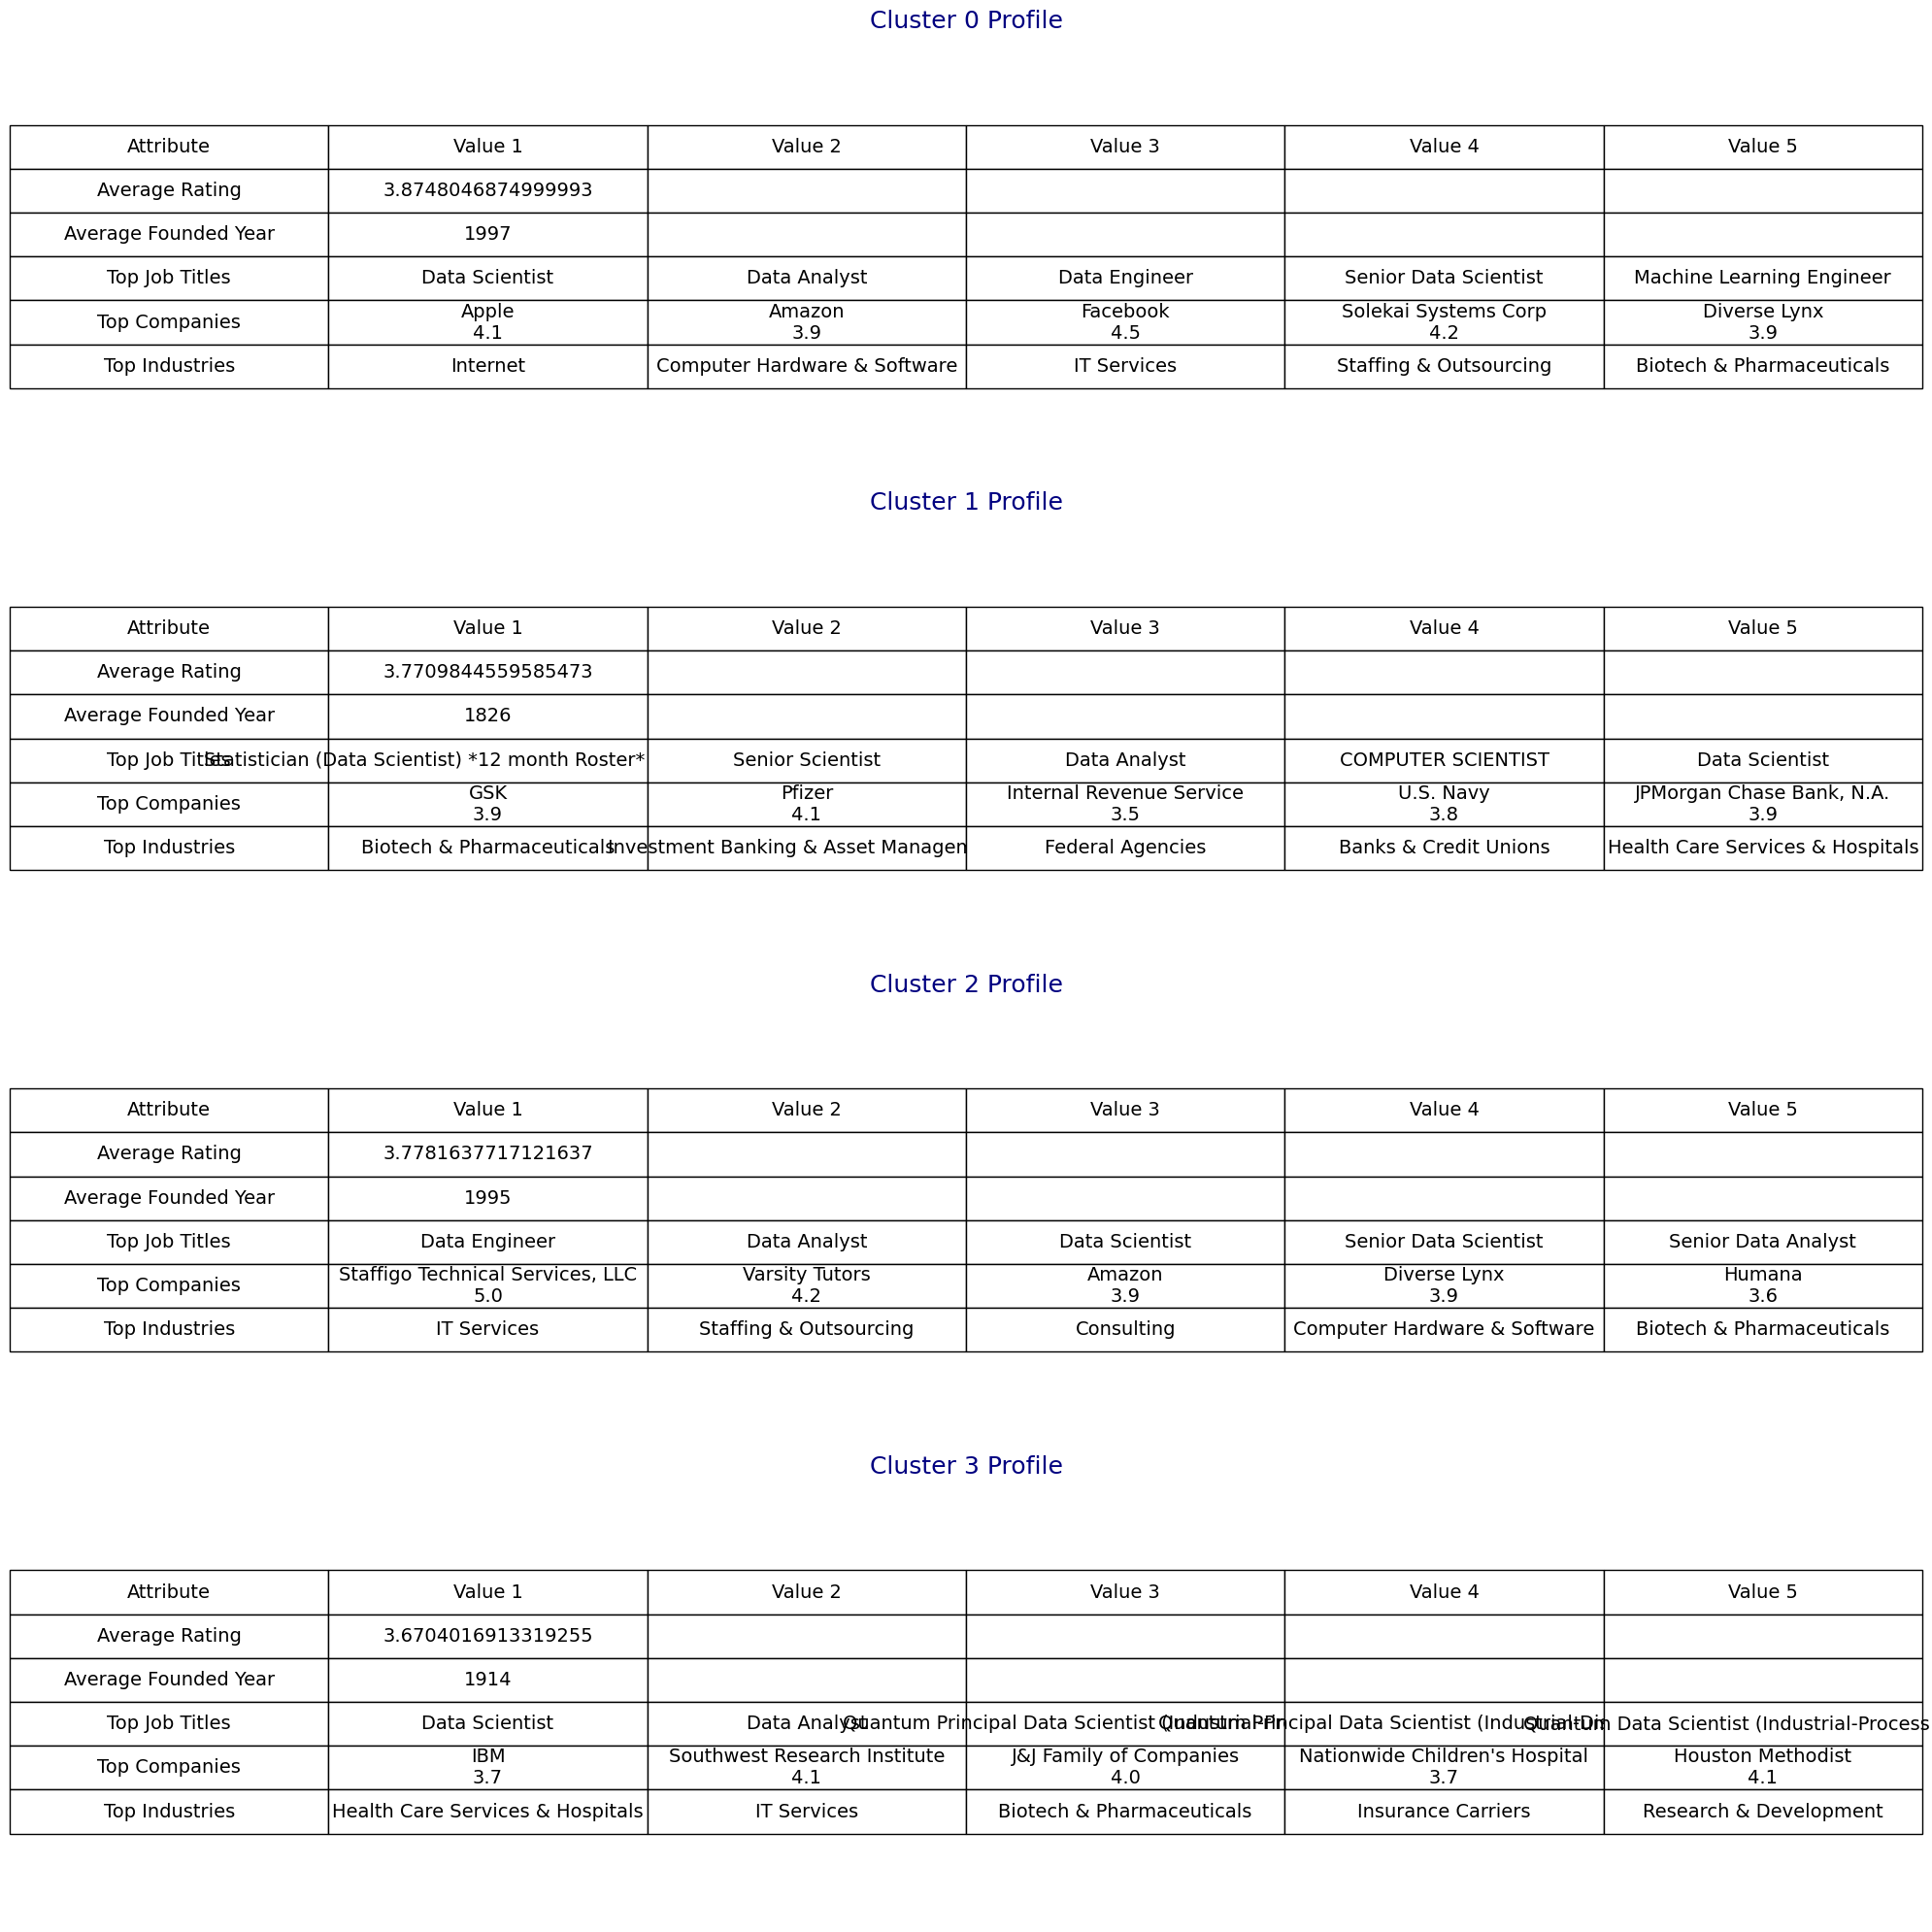

In [55]:
# Creating a more detailed fancy table for each cluster profile using matplotlib

def plot_fancy_table(data, ax, title):
    """
    Plots a fancy table with matplotlib on the given axis (ax)
    """
    # Set the title of the axis
    ax.set_title(title, fontsize=18, color='navy')
    ax.axis('off')  # Turn off the axis
    
    # Prepare table data
    table_data = [["Attribute", "Value 1", "Value 2", "Value 3", "Value 4", "Value 5"]]
    for key, value in data.items():
        if isinstance(value, list):
            # If the value is a list (for top 5 attributes), ensure it has 5 elements
            while len(value) < 5:
                value.append("")
            row = [key] + value
        else:
            # If the value is a single number (for average values), span it over 5 columns
            row = [key, value, "", "", "", ""]
        table_data.append(row)

    # Plot the table
    table = ax.table(cellText=table_data, loc='center', cellLoc='center', colLoc='center')
    table.auto_set_font_size(False)
    table.set_fontsize(14)
    table.scale(1, 2)

# Create a figure to contain the subplots
fig, axs = plt.subplots(kmeans.n_clusters, figsize=(20, 5 * kmeans.n_clusters))

# If only one cluster, axs is not a list so we put it in one for consistency
if kmeans.n_clusters == 1:
    axs = [axs]

# Create a fancy table for each cluster
for i, ax in enumerate(axs):
    cluster_data = {
        'Average Rating': cluster_profiles.loc[i, 'Rating'],
        'Average Founded Year': int(cluster_profiles.loc[i, 'Founded']),
        'Top Job Titles': cluster_profiles.loc[i, 'Top Job Titles'],
        'Top Companies': cluster_profiles.loc[i, 'Top Companies'],
        'Top Industries': cluster_profiles.loc[i, 'Top Industries']
    }
    plot_fancy_table(cluster_data, ax, f'Cluster {i} Profile')

# Adjust layout
plt.tight_layout()
plt.show()
